In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

create grid with unit direction, unit spacing and zero origin

In [2]:
grid_rect = sitk.GridSource(outputPixelType=sitk.sitkUInt16,
    size=(250, 500),
    gridSpacing=(25.0, 25.0),
    gridOffset=(0.0, 0.0),
    spacing=(1,1))

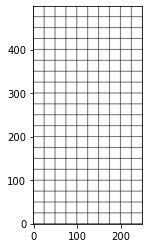

In [3]:
plt.imshow(sitk.GetArrayFromImage(grid_rect), cmap="gray", origin="lower")
plt.show()

# transformations
affine transform and translation, motive is to shear by 0.3 and translate by (125, 250), so that after shear origin will be at (125, 250)

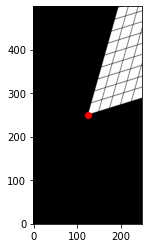

In [4]:
param = (1.0956889234034184, -0.3093362626712529, -0.309336262671253, 1.0)
translation = (-59.62704975761403, -211.33296716609343)

shear_translate_transform = sitk.AffineTransform(2)
shear_translate_transform.SetMatrix(param)
shear_translate_transform.SetTranslation(translation)

shear_plus_translate = sitk.Resample(grid_rect, grid_rect, shear_translate_transform, sitk.sitkLinear, 0.0)

plt.imshow(sitk.GetArrayFromImage(shear_plus_translate), cmap="gray", origin="lower")
plt.plot(125, 250, "ro")
plt.show()

only affine transform

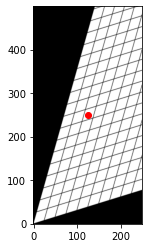

In [5]:
param1 = (1.0956889234034184, -0.3093362626712529, -0.309336262671253, 1.0)
translation1 = (-125.0, -250.0)

shear_transform = sitk.AffineTransform(2)
shear_transform.SetMatrix(param)

only_shear = sitk.Resample(grid_rect, grid_rect, shear_transform, sitk.sitkLinear, 0.0)

plt.imshow(sitk.GetArrayFromImage(only_shear), cmap="gray", origin="lower")
plt.plot(125, 250, "ro")
plt.show()

sheared image translated by (125, 250) and the results are same with first plot

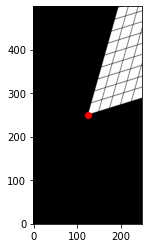

In [6]:
translation2 = (-125, -250)

translate_transform = sitk.AffineTransform(2)
translate_transform.SetTranslation(translation2)

sheared_image_translated = sitk.Resample(only_shear, only_shear, translate_transform, sitk.sitkLinear, 0.0)

plt.imshow(sitk.GetArrayFromImage(sheared_image_translated), cmap="gray", origin="lower")
plt.plot(125, 250, "ro")
plt.show()